<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de **Informações**<br>
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

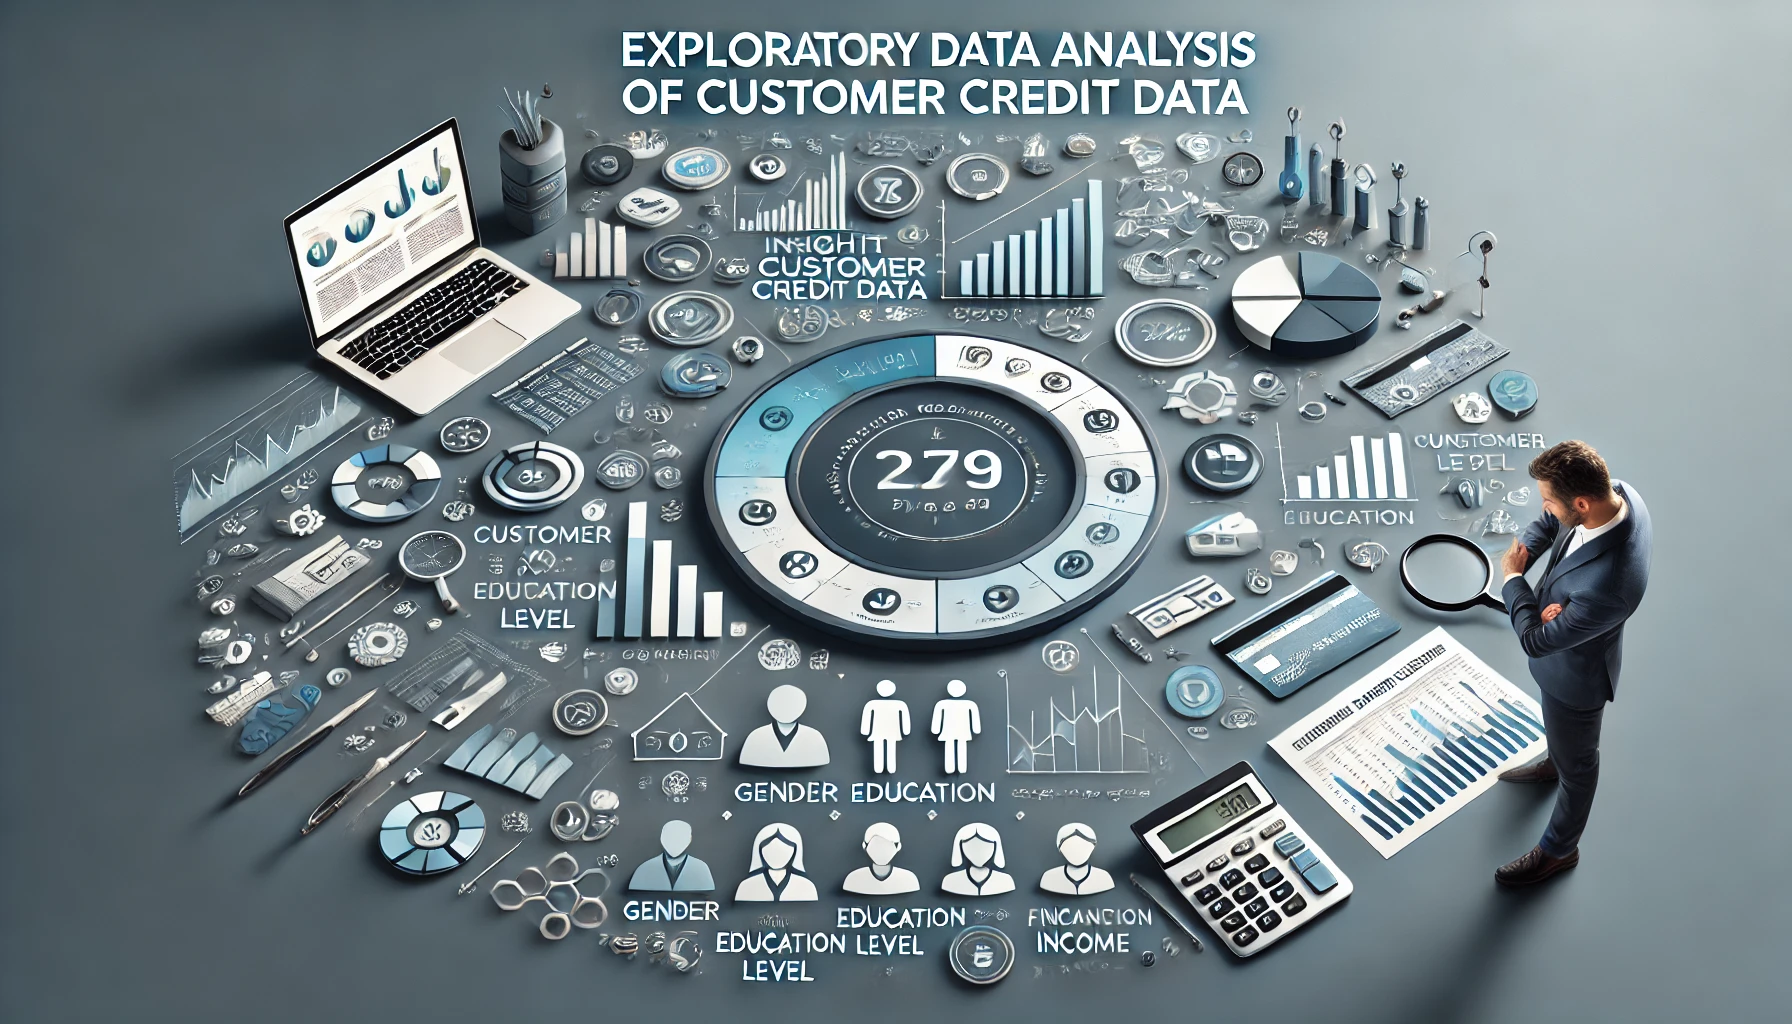

# O PROJETO

# **1.** Exploração e análise de dados de crédito com SQL


**Objetivo:** Este projeto visa realizar uma análise exploratória dos dados de clientes de uma instituição financeira para entender melhor seus comportamentos financeiros. A análise busca examinar relações entre gastos, faixas salariais, inadimplência, entre outros fatores.

Atributos: A base de dados inclui diversas informações dos clientes, detalhadas nas seguintes colunas:

idade: idade do cliente
sexo: gênero do cliente (F ou M)
dependentes: número de dependentes
escolaridade: grau de escolaridade
salario_anual: faixa de renda anual
tipo_cartao: tipo de cartão de crédito
qtd_produtos: total de produtos adquiridos nos últimos 12 meses
iteracoes_12m: quantidade de transações nos últimos 12 meses
meses_inativo_12m: número de meses inativos nos últimos 12 meses
limite_credito: limite de crédito disponível
valor_transacoes_12m: valor total das transações dos últimos 12 meses
qtd_transacoes_12m: total de transações nos últimos 12 meses
Esses dados foram carregados e estão armazenados no AWS Athena, com suporte do S3 Bucket. Uma versão da base pode ser encontrada aqui.

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

Esta tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **2.** Exploraçao dos Dados

No início da análise, vamos explorar os dados disponíveis para conhecer melhor a estrutura e o volume de informações.

Quantos registros estão presentes na base de dados?
Query: SELECT count(*) FROM credito;
Resultado: 2.564 Linhas

Como são as primeiras entradas na tabela?
Query: SELECT * FROM credito LIMIT 10;

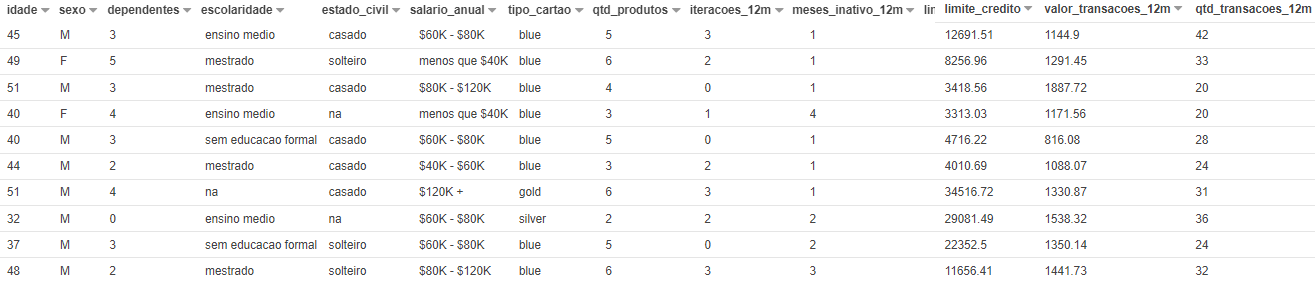

---

## Tipos de Dados:

**QUERY:** DESCRIBE credito

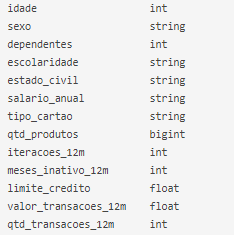

Com esses dados, já podemos identificar a presença de informações nulas na tabela, bem como obter detalhes sobre os tipos de dados utilizados.



## Quais são os tipos de escolaridade presentes no dataset?



**QUERY:** SELECT DISTINCT escolaridade FROM credito



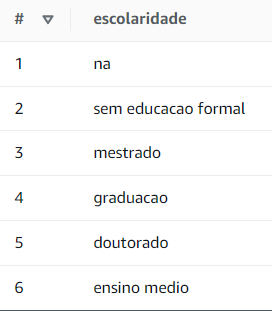



## Quais são os tipos de estado_civil presentes no dataset?



**QUERY:** SELECT DISTINCT estado_civil FROM credito

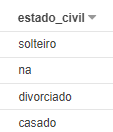

Os dados contam com vários níveis de escolaridade e estado civel, e é possível perceber que temos valores nulos (na) no dataset.


## Quais são os tipos de salario_anual presentes no dataset?



**QUERY:** SELECT DISTINCT salario_anual FROM credito



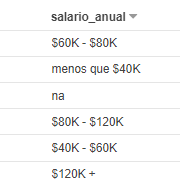

Os salários não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

## Quais são os tipos de cartão presentes no dataset?

**QUERY:** SELECT DISTINCT tipo_cartao FROM credito;

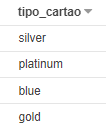

# **3.** Análise dos Dados

Após realizar a exploração para compreender as informações disponíveis no conjunto de dados, vamos agora analisar essas informações para identificar alguns possíveis padrões e relações entre os dados.

## Quantos clientes são homens e quantos são mulheres?

QUERY: select count(*), sexo from credito group by sexo;

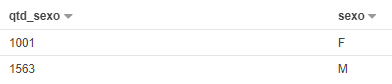

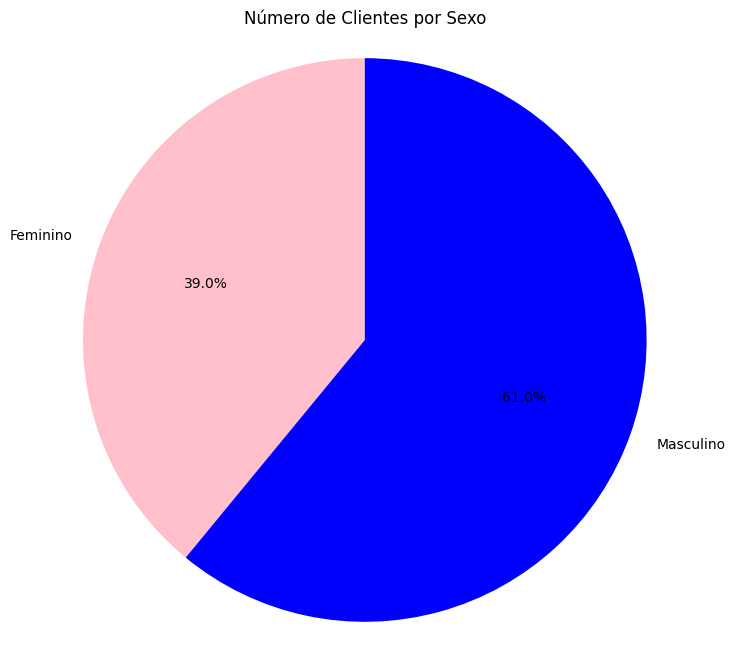

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fictícios (substitua pelos seus dados reais)
data = {'Sexo': ['Feminino', 'Masculino'],
        'Número de Clientes': [1001, 1563]}

df = pd.DataFrame(data)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))  # Ajustar o tamanho da figura
plt.pie(df['Número de Clientes'], labels=df['Sexo'], autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])
plt.title('Número de Clientes por Sexo')
plt.axis('equal')  # Garantir que o gráfico seja um círculo

plt.show()

Analisando o gráfico acima, podemos identificar que a quantidade de clientes do sexo masculino é significativamente maior do que a do sexo feminino.

## Qual a quantidade de clientes por faixa salarial?

QUERY: select count(*), salario_anual from credito group by salario_anual;

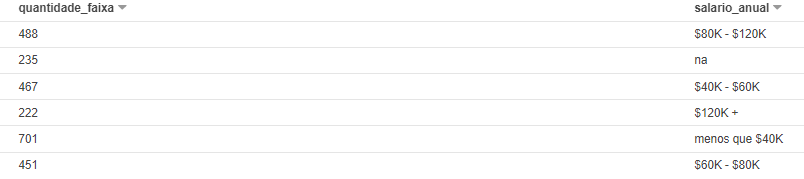

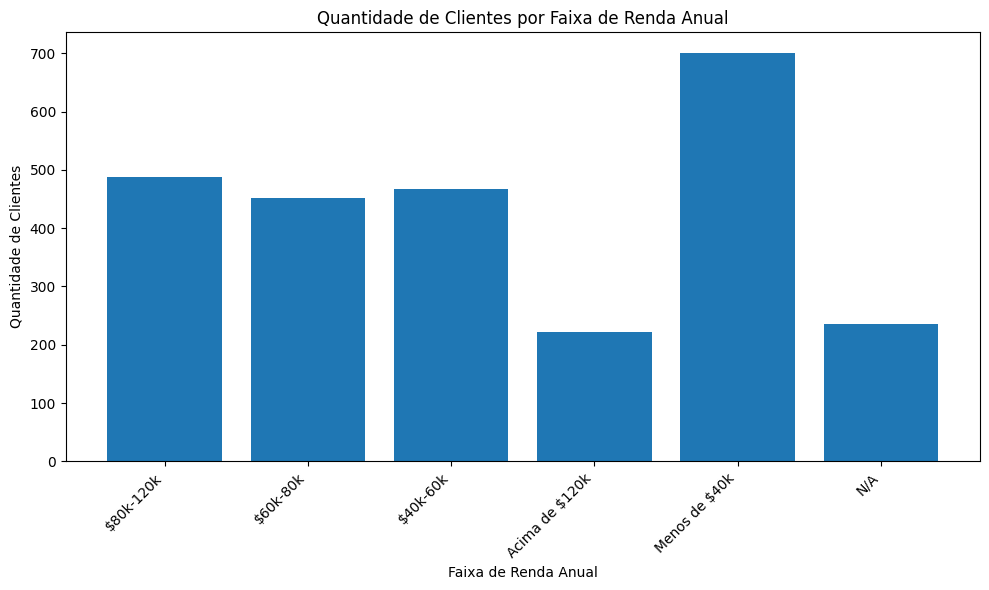

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados da quantidade de clientes por faixa de renda anual
data = {
    'Faixa de Renda Anual': ['$80k-120k', '$60k-80k', '$40k-60k', 'Acima de $120k', 'Menos de $40k', 'N/A'],
    'Quantidade de Clientes': [488, 451, 467, 222, 701, 235]
}

# Criando um DataFrame com os dados
df = pd.DataFrame(data)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Faixa de Renda Anual'], df['Quantidade de Clientes'])
plt.xlabel('Faixa de Renda Anual')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Faixa de Renda Anual')
plt.xticks(rotation=45, ha='right')  # Rotaciona os labels do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

A predominância na base de dados é de clientes com renda inferior a 40 mil, seguido por clientes com faixa salarial entre 80K a 120K. Essa característica sugere oportunidades de foco estratégico para a empresa em duas direções: no segmento de menor renda, buscando atender às necessidades específicas desse grupo, e em ações direcionadas para clientes com renda acima de 80K, visando explorar oportunidades nesse segmento mais elevado.

 ## Quais as características dos clientes que possuem os maiores creditos?

QUERY: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

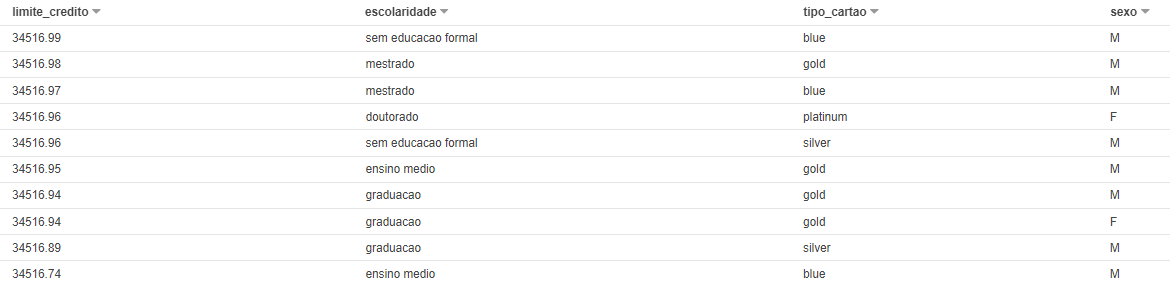

Pelos dados, podemos inferir que a escolaridade não possui um impacto expressivo em relação aos limites. No entanto, observamos que os clientes com limites mais elevados são predominantemente do sexo masculino.

## Quais as características dos clientes que possuem os menores creditos?

QUERY: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

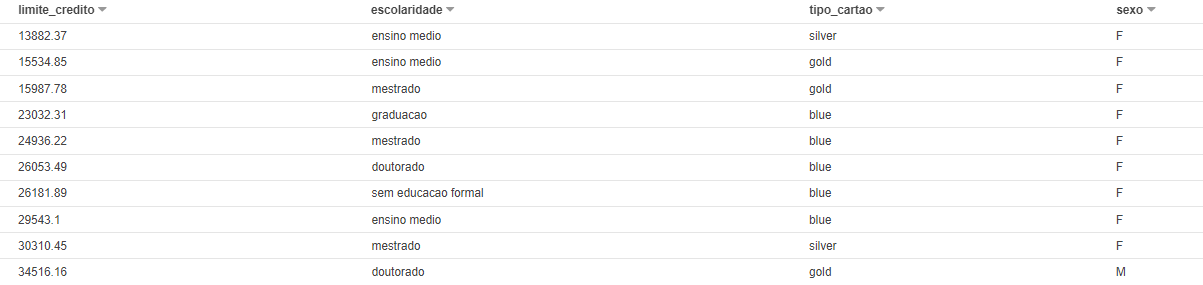

Aqui, é possível identificar que os clientes com menores limites de crédito são predominantemente do sexo feminino, revelando uma tendência entre ambos os conjuntos de dados.

## Qual a media de gastos das mulheres e homens?

QUERY: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

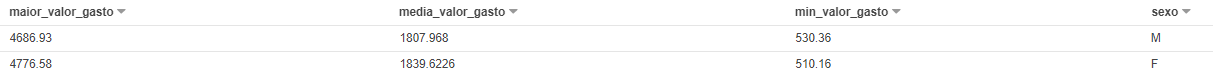

Apesar da diferença de limites, observamos que os gastos entre ambos os sexos são semelhantes.

## Será que o salário impacta no limite?

QUERY: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc



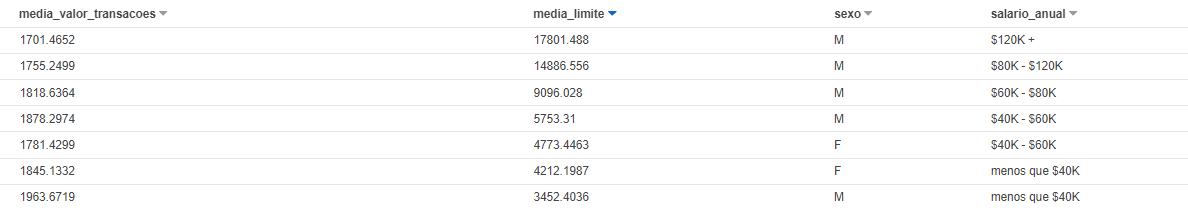

Nitidamente, podemos perceber a relação entre salário e limite de crédito, onde clientes com salários mais elevados tendem a possuir limites de crédito maiores.

## Qual a quantidade de clientes por escolaridade?

QUERY: select count(*), escolaridade from credito group by escolaridade;

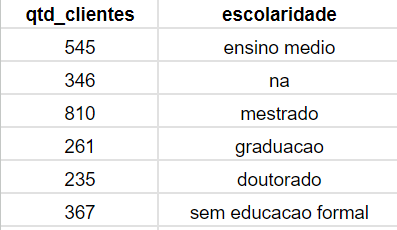

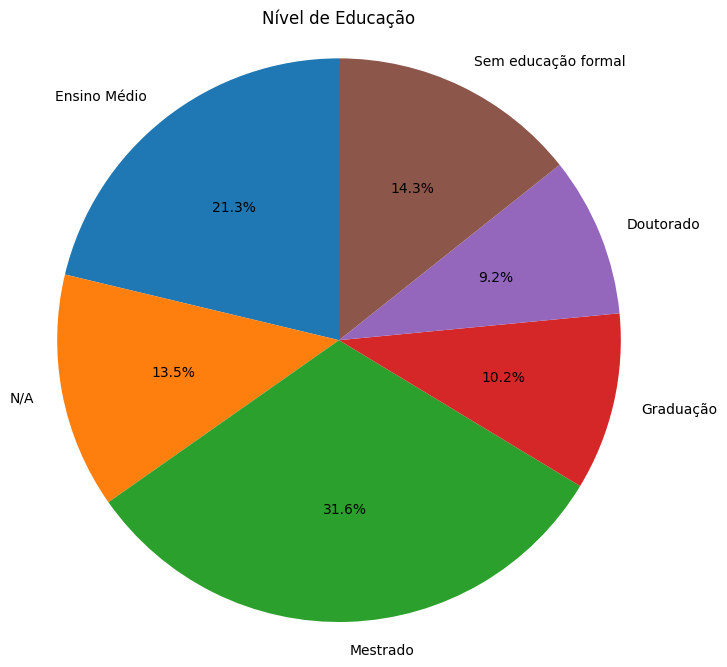

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados
data = {
    'Nível de Educação': ['Ensino Médio', 'N/A', 'Mestrado', 'Graduação', 'Doutorado', 'Sem educação formal'],
    'Quantidade': [545, 346, 810, 261, 235, 367]
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df['Quantidade'], labels=df['Nível de Educação'], autopct='%1.1f%%', startangle=90)
plt.title('Nível de Educação')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

Podemos observar que a maioria dos clientes possui mestrado (31,6%), seguido por aqueles com ensino médio (21,3%). Esses dados indicam boas oportunidades para campanhas de marketing e estratégias de vendas adaptadas a esses dois perfis distintos.


# **4.** Conclusão
Com base na análise exploratória dos dados de crédito, alguns insights relevantes foram identificados e são apresentados a seguir:

A maioria dos clientes é do sexo masculino.
Grande parte dos clientes possui uma faixa de renda anual de até 40 mil.
O nível de escolaridade parece não impactar diretamente o limite de crédito ou o tipo de cartão oferecido.
Clientes com limites de crédito mais altos são, em sua maioria, homens, enquanto os limites mais baixos se concentram entre mulheres.
Existe uma relação direta entre a faixa salarial e o limite de crédito concedido.
Não foram identificadas clientes do sexo feminino com renda anual superior a 60 mil.
A média de gastos dos clientes parece ter pouca ou nenhuma influência no limite de crédito.
Esses insights fornecem uma base sólida para possíveis ações de melhoria nos serviços oferecidos e direcionamento mais eficaz nas estratégias de retenção e atração de clientes.

## Me acompanhe nas redes
[Kaggle](https://www.kaggle.com/code/viktorphilip/notebook4af81fefe2)

[Linkedin](https://www.linkedin.com/in/victorf-pereira/)